In [1]:
# see https://python.plainenglish.io/data-storytelling-5-simple-tips-with-python-plotly-to-spice-up-your-data-00865549f2b7

In [ ]:
# Thanks to Andrea D'Agostino for his helpful Medium article: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee  

In [1]:
# libraries for Exploratory Data Analysis (EDA)

# data manipulation
import pandas as pd
import numpy as np

# data viz
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)


import requests
import json
from pandas import json_normalize
from pprint import pprint


<ipython-input-1-813d3e73e556>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#pip install pandas

In [5]:
#pip install seaborn


In [10]:
#pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 4.4 MB/s eta 0:00:00
     --------------------------------------- 22.9/22.9 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 12.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 5.8 MB/s eta 0:00:00
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: C:\Users\Jenkir\anaconda3\envs\py39USE\python.exe -m pip install --upgrade pip


In [6]:
#pip install plotly.express

In [8]:
import os
os.getcwd()

'C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\PROJECTS\\PRACTICE'

In [10]:
os.chdir('C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\INDUSTRIES')
os.getcwd()

'C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\INDUSTRIES'

In [11]:
# Step 1: Import dataset using read_csv
# The data analysis pipeline begins with the import or creation of a working dataset
# The exploratory analysis phase begins immediately after

# got error until I added    encoding="ISO-8859-1"
df = pd.read_csv("./industry_csvs/materials_sector.csv", encoding="ISO-8859-1")
df.head()


,unique_id,company_name,gicSector,gicSubIndustry,gicIndustry,company_pulse
0,195610,AMG Advanced Metallurgical Group N.V,Materials,Diversified Metals & Mining,Metals & Mining,0.334243
1,195583,"Acerinox, S.A",Materials,Steel,Metals & Mining,0.180600
2,206683,AdvanSix Inc,Materials,Commodity Chemicals,Chemicals,0.597531
3,244892,Advanced Emissions Solutions Inc,Materials,Specialty Chemicals,Chemicals,0.631753
4,191126,Agnico Eagle Mines Limited,Materials,Gold,Metals & Mining,0.330268


### Understand the big picture of the data

In [12]:
# Use .shape to see the # of rows (the first # below) and the # of columns (the second # below) of the dataset.
df.shape

(334, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       334 non-null    int64  
 1   company_name    334 non-null    object 
 2   gicSector       334 non-null    object 
 3   gicSubIndustry  331 non-null    object 
 4   gicIndustry     334 non-null    object 
 5   company_pulse   334 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.8+ KB


In [15]:
# We want to change the unique_id field to text ("str" or "object") because we don't want them to show up in any calculations later on
# change some of the datatypes from int to string
convert = {"unique_id": str,
        
          }
df = df.astype(convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       334 non-null    object 
 1   company_name    334 non-null    object 
 2   gicSector       334 non-null    object 
 3   gicSubIndustry  331 non-null    object 
 4   gicIndustry     334 non-null    object 
 5   company_pulse   334 non-null    float64
dtypes: float64(1), object(5)
memory usage: 15.8+ KB


In [16]:
# Use the .describe function to see descriptive information about the dataset including statistics for numerical variables/ fields
df.describe()

,company_pulse
count,334.000000
mean,0.199630
std,0.324016
min,-0.905705
25%,0.000000
50%,0.214871
75%,0.391066
max,0.956500


In [17]:
# Make sure that the data is properly prepped/ cleaned and ready for analysis
# First, check to see if there are any duplicate rows
# If the output is 0, that's good news because it means that we don't have any duplicates
df.duplicated().sum()

0

In [18]:
# Check whether we need to rename any of the columns to make them more understandable or to fix typos
df.columns

Index(['unique_id', 'company_name', 'gicSector', 'gicSubIndustry',
       'gicIndustry', 'company_pulse'],
      dtype='object')

In [21]:
# We'll just change the names of three columns for now
# Using inplace = True means that the original dataframe will be modified permanently; 
# be careful when using inplace=True; for more info., see  https://towardsdatascience.com/a-simple-guide-to-inplace-operations-in-pandas-7a1d97ecce24
df1 = df.rename(columns = {"gicSector": "GIC_Sector",
                    "gicSubIndustry": "GIC_SubIndustry",
                    "gicIndustry": "GIC_Industry"      
                          })
                   
df1.head()

,unique_id,company_name,GIC_Sector,GIC_SubIndustry,GIC_Industry,company_pulse
0,195610,AMG Advanced Metallurgical Group N.V,Materials,Diversified Metals & Mining,Metals & Mining,0.334243
1,195583,"Acerinox, S.A",Materials,Steel,Metals & Mining,0.180600
2,206683,AdvanSix Inc,Materials,Commodity Chemicals,Chemicals,0.597531
3,244892,Advanced Emissions Solutions Inc,Materials,Specialty Chemicals,Chemicals,0.631753
4,191126,Agnico Eagle Mines Limited,Materials,Gold,Metals & Mining,0.330268


### Univariate analysis/ understand the variables

In [37]:
# Use .value_counts() to see how many companies are in each GIC SubIndustry;
# For example, you can see below that 52 companies are in the "Specialty Chemicals" subindustry 
# while only one company is in "Health Care Equipment."
df1.GIC_SubIndustry.value_counts()

GIC_SubIndustry
Specialty Chemicals                     52
Steel                                   51
Commodity Chemicals                     33
Diversified Metals & Mining             29
Construction Materials                  29
Fertilizers & Agricultural Chemicals    22
Gold                                    21
Paper Products                          18
Diversified Chemicals                   14
Paper Packaging                         14
Metal & Glass Containers                13
Aluminum                                 9
Copper                                   8
Forest Products                          6
Silver                                   4
Precious Metals & Minerals               4
Industrial Gases                         3
Health Care Equipment                    1
Name: count, dtype: int64

In [38]:
# use normalize=True to see percentages
df1.GIC_SubIndustry.value_counts(normalize=True)

GIC_SubIndustry
Specialty Chemicals                     0.157100
Steel                                   0.154079
Commodity Chemicals                     0.099698
Diversified Metals & Mining             0.087613
Construction Materials                  0.087613
Fertilizers & Agricultural Chemicals    0.066465
Gold                                    0.063444
Paper Products                          0.054381
Diversified Chemicals                   0.042296
Paper Packaging                         0.042296
Metal & Glass Containers                0.039275
Aluminum                                0.027190
Copper                                  0.024169
Forest Products                         0.018127
Silver                                  0.012085
Precious Metals & Minerals              0.012085
Industrial Gases                        0.009063
Health Care Equipment                   0.003021
Name: proportion, dtype: float64

In [26]:
#  evaluate distribution kurtosis and asymmetry/ skewness
# kurtosis is a statistical measure that indicates how much data is in the "tails" (furthest from the mean of the data) of normally distributed data 
# "Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve...
# "Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution." 
# Skewness is used along with kurtosis to better judge the likelihood of data falling in the tails of a probability distribution
# - Investopedia
print(f"Skewness: {df1['company_pulse'].skew()}")
print(f"kurtosis: {df1['company_pulse'].kurt()}")

Skewness: -0.4974364761022389
kurtosis: 1.1190510830705693


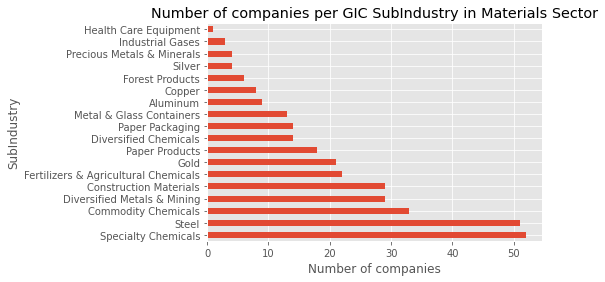

In [27]:
# Plot a simple horizontal bar chart of categorical data using matplotlib (be sure you have imported the matplotlib library as plt)
df1.GIC_SubIndustry.value_counts().plot(kind="barh")
plt.title("Number of companies per GIC SubIndustry in Materials Sector")
plt.xlabel("Number of companies")
plt.ylabel("SubIndustry")
plt.show()

# I got error message: AttributeError: module 'matplotlib' has no attribute 'title' 
# until I changed   import matplotlib as plt to import matplotlib.pyplot as plt

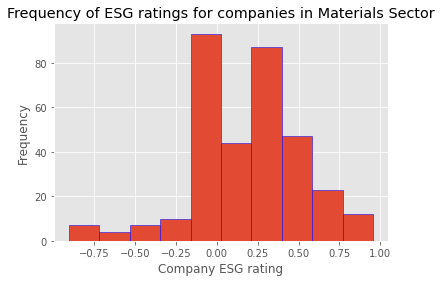

In [28]:
# Plot a histogram of the company pulse data; histograms are a graphic representation of numerical data distribution

data = df1.company_pulse  # save the company_pulse data in variable called "data"
plt.hist(data, bins = 10, edgecolor='blue')

plt.ylabel('Frequency')
plt.xlabel("Company ESG rating")
plt.title("Frequency of ESG ratings for companies in Materials Sector")
plt.show()

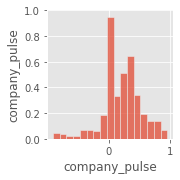

In [29]:
#sns.pairplot(df1)

C:\Users\Jenkir\anaconda3\envs\py39USE\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


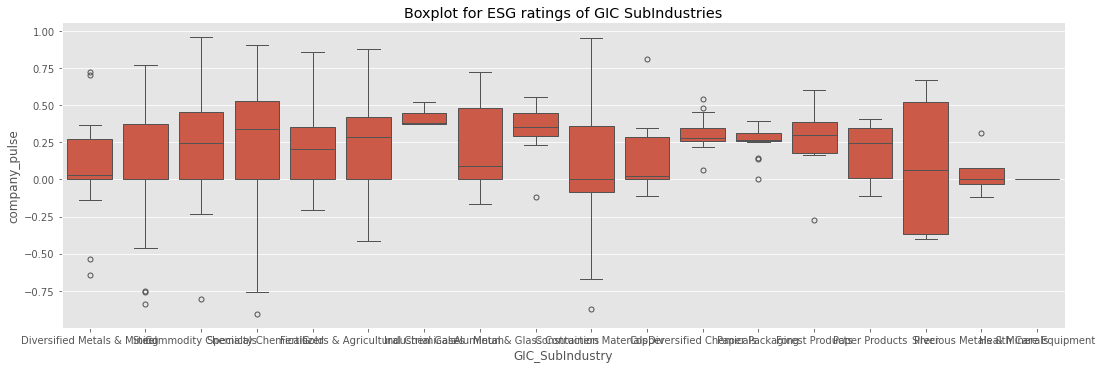

In [41]:
# Check out the relationship between a categorical variable (GIC SubIndustry) and a numerical one (company pulse) using a boxplot

sns.catplot(x='GIC_SubIndustry', y="company_pulse", data=df1, kind="box", aspect=3.0)
plt.title("Boxplot for ESG ratings of GIC SubIndustries")

plt.show()

# The limits of the boxes indicate the range of the CENTRAL 50% OF THE DATA, the central horizontal line marks the median, 
# the lines that extend from each box capture the range of the remaining data
# any dots beyond the line edges show outliers


C:\Users\Jenkir\anaconda3\envs\py39USE\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


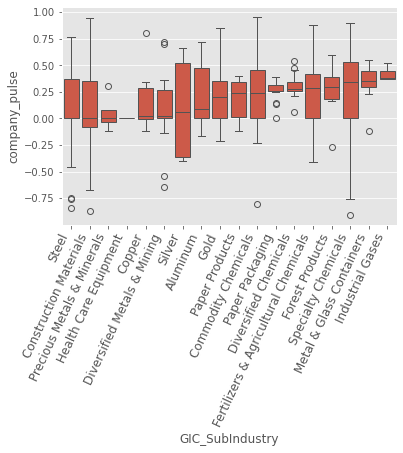

In [42]:
# Rotate the x axis labels and sort the boxplot by median
grouped = df1.loc[:,["GIC_SubIndustry", "company_pulse"]]\
    .groupby(["GIC_SubIndustry"])\
    .median()\
    .sort_values(by="company_pulse")
sns.boxplot(x=df1.GIC_SubIndustry, y=df1.company_pulse, order=grouped.index)

plt.xticks(rotation=65, fontsize='large', ha='right')  # "ha" means horizontal alignment, if you don't use this, the labels won't be centered well

#    fontweight='light'

plt.show()